In [13]:
from collections import defaultdict
import json
import torch
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_fscore_support, accuracy_score
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
simplefilter("ignore", category=ConvergenceWarning)

### Classification using top neurons

In [9]:
seeds = [1, 42, 66, 88, 3419]
topks = [1500, 1200, 900, 700, 500, 300, 150, 50, 30, 20, 10]
train_name, test_names = 'beavertails', ['jailbreak_llms', 'harmbench', 'hh_harmless', 'red_team_attempts']
clf_cls = LogisticRegression
# param = {'max_iter': 100}
param = {}

In [48]:
top_neuron_f1, random_neuron_f1, last_random_neuron_f1, everywhere_random_neuron_f1 = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
for topk in topks[::-1]:
    for test_name in test_names:
        print(f'topk: {topk}, dataset: {test_name}')
        data_train = f'/data1/cjh/Alignment/output/activations/harmless_prediction/{train_name}_-1_Llama-2-7b-hf_sharegpt_ia3_ff_1_top{topk}.pt'
        data_test = f'/data1/cjh/Alignment/output/activations/harmless_prediction/{test_name}_-1_Llama-2-7b-hf_sharegpt_ia3_ff_1_top{topk}.pt'
        X_train, y_train = torch.load(data_train)
        X_test, y_test = torch.load(data_test)
        clf = clf_cls(**param)
        clf.fit(X_train, y_train)
        top_neuron_f1[test_name].append(accuracy_score(y_test, clf.predict(X_test)))

        scores = []
        for seed in seeds:
            data_train = f'/data1/cjh/Alignment/output/activations/harmless_prediction/{train_name}_-1_Llama-2-7b-hf_sharegpt_ia3_ff_1_top{topk}_seed{seed}.pt'
            data_test = f'/data1/cjh/Alignment/output/activations/harmless_prediction/{test_name}_-1_Llama-2-7b-hf_sharegpt_ia3_ff_1_top{topk}_seed{seed}.pt'
            X_train, y_train = torch.load(data_train)
            X_test, y_test = torch.load(data_test)
            clf = clf_cls(**param)
            clf.fit(X_train, y_train)
            scores.append(accuracy_score(y_test, clf.predict(X_test)))
        random_neuron_f1[test_name].append(np.mean(scores))
        
        scores = []
        for seed in seeds:
            data_train = f'/data1/cjh/Alignment/output/activations/harmless_prediction/{train_name}_-1_Llama-2-7b-hf_sharegpt_ia3_ff_1_last_top{topk}_seed{seed}.pt'
            data_test = f'/data1/cjh/Alignment/output/activations/harmless_prediction/{test_name}_-1_Llama-2-7b-hf_sharegpt_ia3_ff_1_last_top{topk}_seed{seed}.pt'
            X_train, y_train = torch.load(data_train)
            X_test, y_test = torch.load(data_test)
            clf = clf_cls(**param)
            clf.fit(X_train, y_train)
            scores.append(accuracy_score(y_test, clf.predict(X_test)))
        last_random_neuron_f1[test_name].append(np.mean(scores))

        # scores = []
        # for seed in seeds:
        #     data_train = f'/data1/cjh/Alignment/output/activations/harmless_prediction/{train_name}_-1_Llama-2-7b-hf_sharegpt_ia3_ff_1_everywhere_top{topk}_seed{seed}.pt'
        #     data_test = f'/data1/cjh/Alignment/output/activations/harmless_prediction/{test_name}_-1_Llama-2-7b-hf_sharegpt_ia3_ff_1_everywhere_top{topk}_seed{seed}.pt'
        #     X_train, y_train = torch.load(data_train)
        #     X_test, y_test = torch.load(data_test)
        #     clf = clf_cls(**param)
        #     clf.fit(X_train, y_train)
        #     scores.append(f1_score(y_test, clf.predict(X_test)))
        # everywhere_random_neuron_f1[test_name].append(np.mean(scores))

topk: 10, dataset: jailbreak_llms
topk: 10, dataset: harmbench
topk: 10, dataset: hh_harmless
topk: 10, dataset: red_team_attempts
topk: 20, dataset: jailbreak_llms
topk: 20, dataset: harmbench
topk: 20, dataset: hh_harmless
topk: 20, dataset: red_team_attempts
topk: 30, dataset: jailbreak_llms
topk: 30, dataset: harmbench
topk: 30, dataset: hh_harmless
topk: 30, dataset: red_team_attempts
topk: 50, dataset: jailbreak_llms
topk: 50, dataset: harmbench
topk: 50, dataset: hh_harmless
topk: 50, dataset: red_team_attempts
topk: 150, dataset: jailbreak_llms
topk: 150, dataset: harmbench
topk: 150, dataset: hh_harmless
topk: 150, dataset: red_team_attempts
topk: 300, dataset: jailbreak_llms
topk: 300, dataset: harmbench
topk: 300, dataset: hh_harmless
topk: 300, dataset: red_team_attempts
topk: 500, dataset: jailbreak_llms
topk: 500, dataset: harmbench
topk: 500, dataset: hh_harmless
topk: 500, dataset: red_team_attempts
topk: 700, dataset: jailbreak_llms
topk: 700, dataset: harmbench
topk: 

In [56]:
for test_name in test_names:
    acc_maj = []
    print(f'dataset: {test_name}')
    data_test = f'/data1/cjh/Alignment/output/activations/harmless_prediction/{test_name}_-1_Llama-2-7b-hf_sharegpt_ia3_ff_1_top1500.pt'
    _, y_test = torch.load(data_test)
    y_pred = torch.ones_like(y_test) if y_test.float().mean() > 0.5 else torch.zeros_like(y_test)
    acc_maj.append(accuracy_score(y_test, y_pred))
np.mean(acc_maj)

dataset: jailbreak_llms
dataset: harmbench
dataset: hh_harmless
dataset: red_team_attempts


0.6584276584276584

In [5]:
with open('../results/result.json', 'r') as f:
    results = json.load(f)

In [50]:
results = {'safety_neuron': top_neuron_f1, 'random_neuron': random_neuron_f1, 'random_neuron_last': last_random_neuron_f1}

In [51]:
with open('../results/result_acc.json', 'w') as f:
    json.dump(results, f, indent=4)

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as font_manager

# sns.set_theme(style="whitegrid", rc={'font.family': 'sans-serif', 'font.sans-serif': 'Helvetica'}, palette='Dark2')

In [2]:
def create_df(results: list[dict], test_names: list[str], neuron_types: list[str], topk: list[int]):
    df_dict = {'f1': [], 'topk': [], 'Test Dataset': [], 'Neuron Type': []}
    for result, neuron_type in zip(results, neuron_types):
        for test_name in test_names:
            df_dict['f1'] += result[test_name]
            df_dict['topk'] += topk
            df_dict['Test Dataset'] += [test_name] * len(topk)
            df_dict['Neuron Type'] += [neuron_type] * len(topk)
    return pd.DataFrame(data=df_dict)

In [10]:
with open('../results/result_f1.json', 'r') as f:
    results = json.load(f)
df = create_df(results.values(), test_names=test_names, neuron_types=['Safety Neuron', 'Random Neuron', 'Random Neuron(last)'], topk=topks[::-1])

In [12]:
df

,f1,topk,Test Dataset,Neuron Type
0,0.483871,10,jailbreak_llms,Safety Neuron
1,0.626039,20,jailbreak_llms,Safety Neuron
2,0.622340,30,jailbreak_llms,Safety Neuron
3,0.746929,50,jailbreak_llms,Safety Neuron
4,0.812362,150,jailbreak_llms,Safety Neuron
...,...,...,...,...
127,0.701218,500,red_team_attempts,Random Neuron(last)
128,0.706396,700,red_team_attempts,Random Neuron(last)
129,0.713276,900,red_team_attempts,Random Neuron(last)
130,0.719643,1200,red_team_attempts,Random Neuron(last)


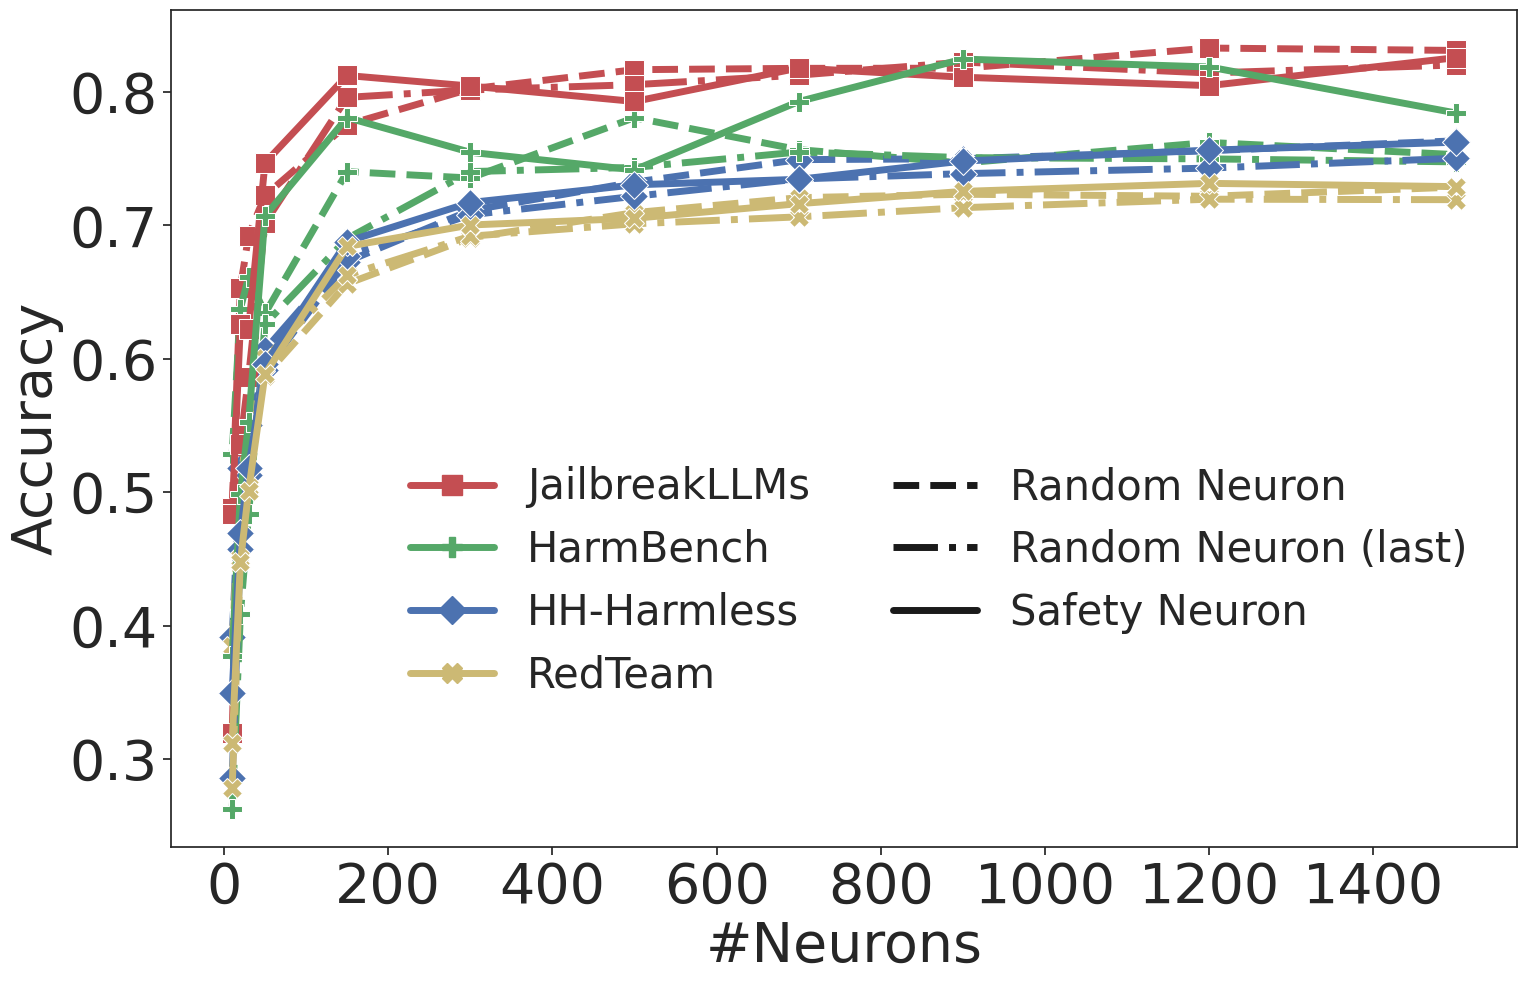

In [25]:
fontsize = 40
linewidth = 5
markersize = 14
sns.set_theme(style='ticks')
# Initialize the plot
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
legend_name_map = {'jailbreak_llms': 'JailbreakLLMs', 'harmbench': 'HarmBench', 'hh_harmless':'HH-Harmless', 'red_team_attempts':'RedTeam'}
# Define the colors and markers for each model
colors = {legend_name_map[name]: c for name, c in zip(test_names, ['r','g','b','y'])}
markers = {legend_name_map[name]: m for name, m in zip(test_names, ['s','P','D','X'])}

# Plot for 'Base'
for neuron_type, linestyle in zip(['Random Neuron', 'Random Neuron(last)', 'Safety Neuron'], ['--', '-.', '-']):
    for dataset in df['Test Dataset'].unique():
        subset = df[(df['Test Dataset'] == dataset) & (df['Neuron Type'] == neuron_type)]
        if not subset.empty:
            sns.lineplot(
                data=subset,
                x='topk', y='f1', ax=ax,
                color=colors[legend_name_map[dataset]],
                marker=markers[legend_name_map[dataset]],
                linestyle=linestyle,
                linewidth=linewidth,
                markersize=markersize
            )

# Customize the plots
ax.set_xlabel('#Neurons', fontsize=fontsize)
ax.set_ylabel('Accuracy', fontsize=fontsize)

# ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
plt.setp(ax.get_xticklabels(), fontsize=fontsize)
plt.setp(ax.get_yticklabels(), fontsize=fontsize)
    
# Create custom legend
legend_elements = [
    Line2D([0], [0], color='k', lw=linewidth, markersize=markersize, linestyle='--', label='Random Neuron'),
    Line2D([0], [0], color='k', lw=linewidth, markersize=markersize, linestyle='-.', label='Random Neuron (last)'),
    Line2D([0], [0], color='k', lw=linewidth, markersize=markersize, linestyle='-', label='Safety Neuron'),
]

legend_elements = [Line2D([0], [0], color=colors[key], lw=linewidth, markersize=markersize, marker=markers[key], label=key) for key in colors.keys()] + legend_elements

# axes[0].legend(handles=legend_elements, title='Model and Neuron Type')
ax.legend(handles=legend_elements, title=None, ncol=2, fontsize=30, frameon=False, loc='upper left', bbox_to_anchor=(0.15,0.5))

plt.tight_layout()
plt.savefig('./fig/harm_prediction.pdf', dpi=300, format='pdf', bbox_inches="tight")

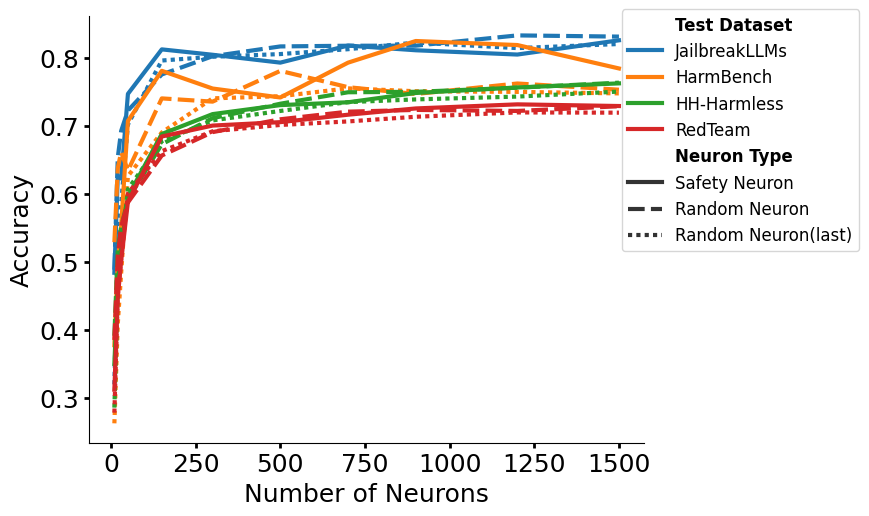

In [11]:
fontsize = 18
legend_name_map = {'jailbreak_llms': 'JailbreakLLMs', 'harmbench': 'HarmBench', 'hh_harmless':'HH-Harmless', 'red_team_attempts':'RedTeam'}
g = sns.relplot(x='topk', y='f1', data=df, hue='Test Dataset', kind='line', style='Neuron Type', aspect=1.3, linewidth=3)
g.set_axis_labels(x_var='Number of Neurons', y_var='Accuracy', fontsize=fontsize)
for ax in g.axes.flat:
    ax.tick_params(axis='both', labelsize=fontsize, width=2)  # Adjust ticks appearance
sns.move_legend(g, 'upper left', bbox_to_anchor=(0.72,1), fontsize=12, frameon=True)
# Access the legend object and modify font properties
legend = g._legend
# Define a custom font
custom_font = font_manager.FontProperties(style='normal', weight=700, size=12)

# Loop through the legend texts and apply font changes based on the label
for text in legend.texts:
    if text.get_text() in legend_name_map:
        text.set_text(legend_name_map[text.get_text()])
    if text.get_text() == 'Test Dataset' or text.get_text() == 'Neuron Type':
        text.set_fontproperties(custom_font)

# plt.savefig('./fig/harm_prediction.pdf', dpi=600, format='pdf', bbox_inches="tight")

In [ ]:
df_melted

,Method,Model,Mean,Std
0,Base,Llama2,2.21,11.81
1,SFT,Llama2,-2.33,15.26
2,DPO,Llama2,-11.85,5.27
3,Base,Mistral,-1.13,13.35
4,SFT,Mistral,-7.50,11.58
5,DPO,Mistral,-13.55,5.30
6,Base,Gemma,0.58,12.82
7,SFT,Gemma,-9.54,10.50
8,DPO,Gemma,-13.78,5.45


In [55]:
for neuron, result in results.items():
    print(neuron)
    acc_150, acc_1500 = [], []
    for dataset, metrics in result.items():
        # print(dataset, metrics[4], metrics[-1])
        acc_150.append(metrics[4])
        acc_1500.append(metrics[-1])
    print(np.mean(acc_150), np.mean(acc_1500))

safety_neuron
0.7778139032716225 0.7935710218633026
random_neuron
0.7504166480230612 0.7884588705252658
random_neuron_last
0.75375356418607 0.7850187110225577


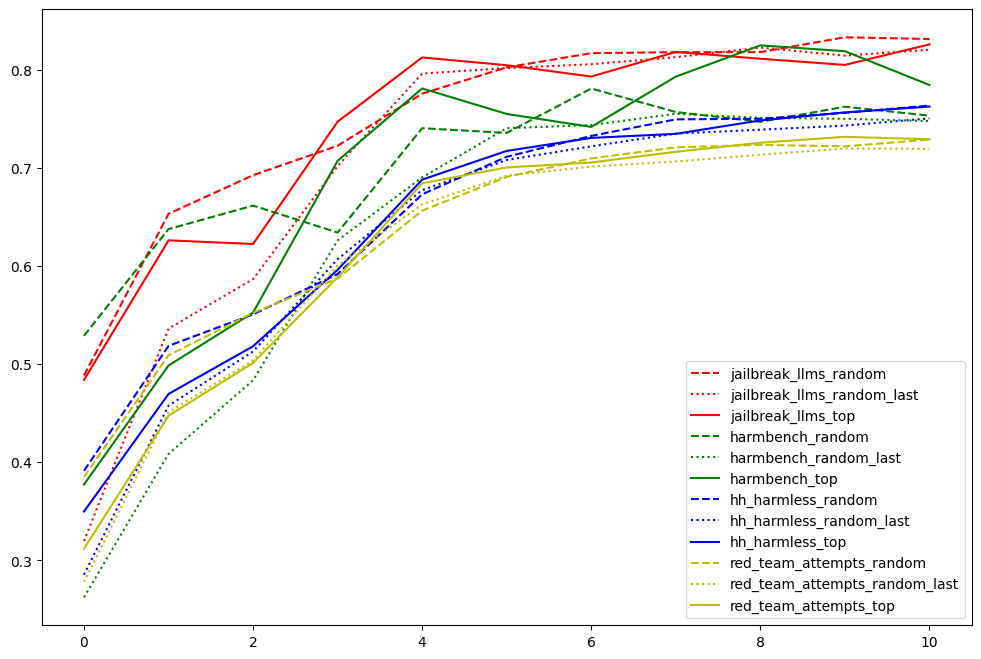

In [4]:
plt.figure(figsize=(12,8))
colors = ['r', 'g', 'b', 'y']
for i, test_name in enumerate(test_names):
    plt.plot(random_neuron_f1[test_name], label=f'{test_name}_random', linestyle='dashed', c=colors[i])
    plt.plot(last_random_neuron_f1[test_name], label=f'{test_name}_random_last', linestyle='dotted', c=colors[i])
    plt.plot(top_neuron_f1[test_name], label=f'{test_name}_top', c=colors[i])   
plt.legend()

In [5]:
random_neuron_f1

defaultdict(list,
            {'jailbreak_llms': [0.4883885452266285,
              0.6531071911260424,
              0.6923997670382303,
              0.7224189536883789,
              0.7754901996557357,
              0.8022990760752707,
              0.8167097599328145,
              0.8177184126355425,
              0.817808559194065,
              0.8329214848833022,
              0.8311457372331631],
             'harmbench': [0.528816350780984,
              0.6375252551589011,
              0.6614607624116016,
              0.6340163157776426,
              0.7402767868722065,
              0.7355196770327758,
              0.7807311316439837,
              0.7567670536164799,
              0.7467688664629197,
              0.7621847133197588,
              0.7530546686720366],
             'hh_harmless': [0.3912771143294436,
              0.5185344157156859,
              0.5507207137861452,
              0.591659217280443,
              0.6729386684257183,
              0.711

In [3]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/data1/cjh/miniconda3/envs/alignment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8290598290598291

In [4]:
f1_score(y_test, clf.predict(X_test))

0.748717174766073

### Classification using random neurons

In [6]:
data_train = f'/data1/cjh/Alignment/output/activations/{train_name}_-1_Llama-2-7b-hf_sharegpt_ia3_ff_1_top10000_random.pt'
data_test = f'/data1/cjh/Alignment/output/activations/{test_name}_-1_Llama-2-7b-hf_sharegpt_ia3_ff_1_top10000_random.pt'
X_train, y_train = torch.load(data_train)
X_test, y_test = torch.load(data_test)

In [7]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/data1/cjh/miniconda3/envs/alignment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8321141654474988

In [8]:
f1_score(y_test, clf.predict(X_test))

0.751547840619896